<a href="https://colab.research.google.com/github/akshaypat444/tensorflow_practice/blob/main/02_NeuralNetworks_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make moons model

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

## Get the data

In [12]:
X_train, y_train = make_circles(100)

In [13]:
X_train.shape, y_train.shape

((100, 2), (100,))

## Visualize the data

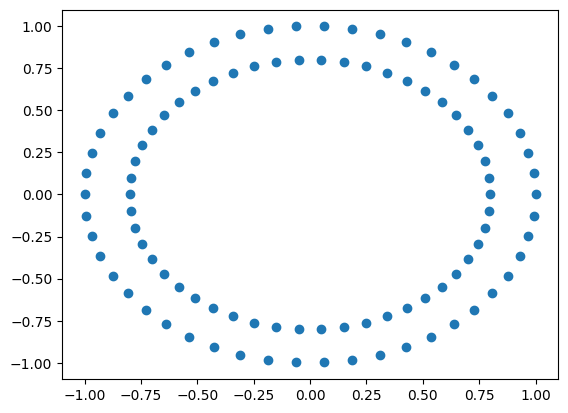

In [15]:
plt.scatter(X_train[:,0], X_train[:,1])

## Create a model to fit the data

In [31]:
tf.random.set_seed(42)

# Create a model
moon_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile a model
moon_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   metrics="accuracy")

# Fit a model
history = moon_model.fit(X_train, y_train, epochs=150)

Epoch 1/150
4/4 [==============================] - 3s 6ms/step - loss: 0.6970 - accuracy: 0.5100
Epoch 2/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6942 - accuracy: 0.5100
Epoch 3/150
4/4 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.5100
Epoch 4/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5200
Epoch 5/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5300
Epoch 6/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5000
Epoch 7/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6911 - accuracy: 0.5000
Epoch 8/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5000
Epoch 9/150
4/4 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 10/150
4/4 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5000
Epoch 11/150
4/4 [===========

In [32]:
def plot_decision_boundary(model, X, y):
  """ Plot decision boundary created by model predicting on X
  """
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.xlim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
Doing binary classification


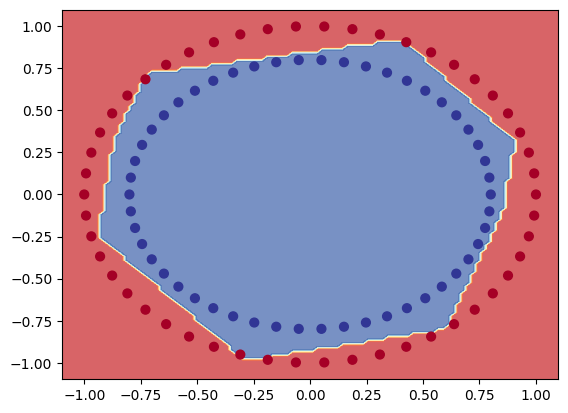

In [33]:
plot_decision_boundary(model=moon_model, X=X_train, y=y_train)

Text(0.5, 0, 'epochs')

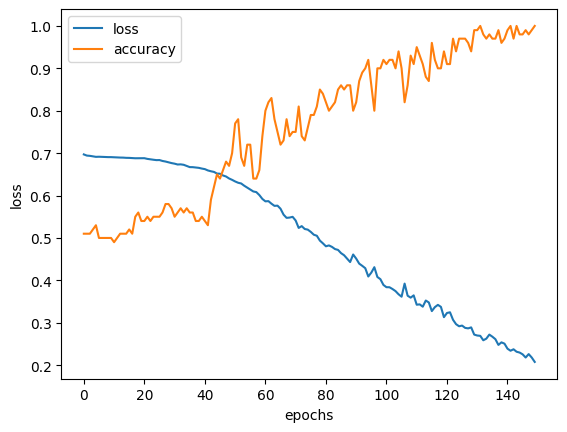

In [34]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

# Fashion MNIST Model

In [37]:
from tensorflow.keras.datasets import fashion_mnist

In [38]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


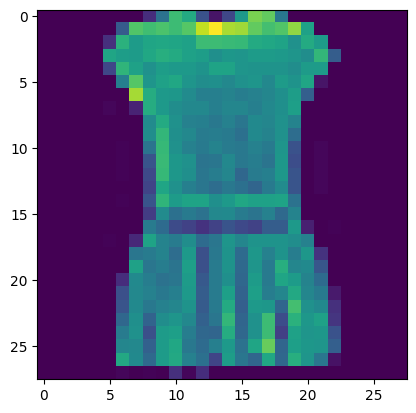

In [40]:
plt.imshow(train_data[3])

In [41]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [44]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

## Normalize the data

In [45]:
train_norm = train_data / train_data.max()
test_norm = test_data / test_data.max()

## MNIST model 1

In [57]:
tf.random.set_seed(42)

# Create a model
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])


# Compile a model
mnist_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# Fit a model
history_2 = mnist_model.fit(train_norm, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7990 - accuracy: 0.7269
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5019 - accuracy: 0.8270
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4675 - accuracy: 0.8370
Epoch 4/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4466 - accuracy: 0.8446
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4343 - accuracy: 0.8477
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4241 - accuracy: 0.8515
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4174 - accuracy: 0.8539
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4097 - accuracy: 0.8558
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4037 - accuracy: 0.8581
Epoch 10/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.399

In [56]:
mnist_model.evaluate(test_norm, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5048 - accuracy: 0.8260


[0.5048085451126099, 0.8259999752044678]

**NOTE** : After increaing the number of neurons in hidden layers mnist model has crossed the accuracy of 85%

## Confusion Matrix

In [53]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize = (20,20), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix", xlabel="Predicted Label", ylabel="True Label",
        xticks=np.arange(n_classes), yticks=np.arange(n_classes),
        xticklabels=labels, yticklabels=labels)

  threshold = (cm.max() + cm.min()) / 2


  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

313/313 [==============================] - 1s 4ms/step


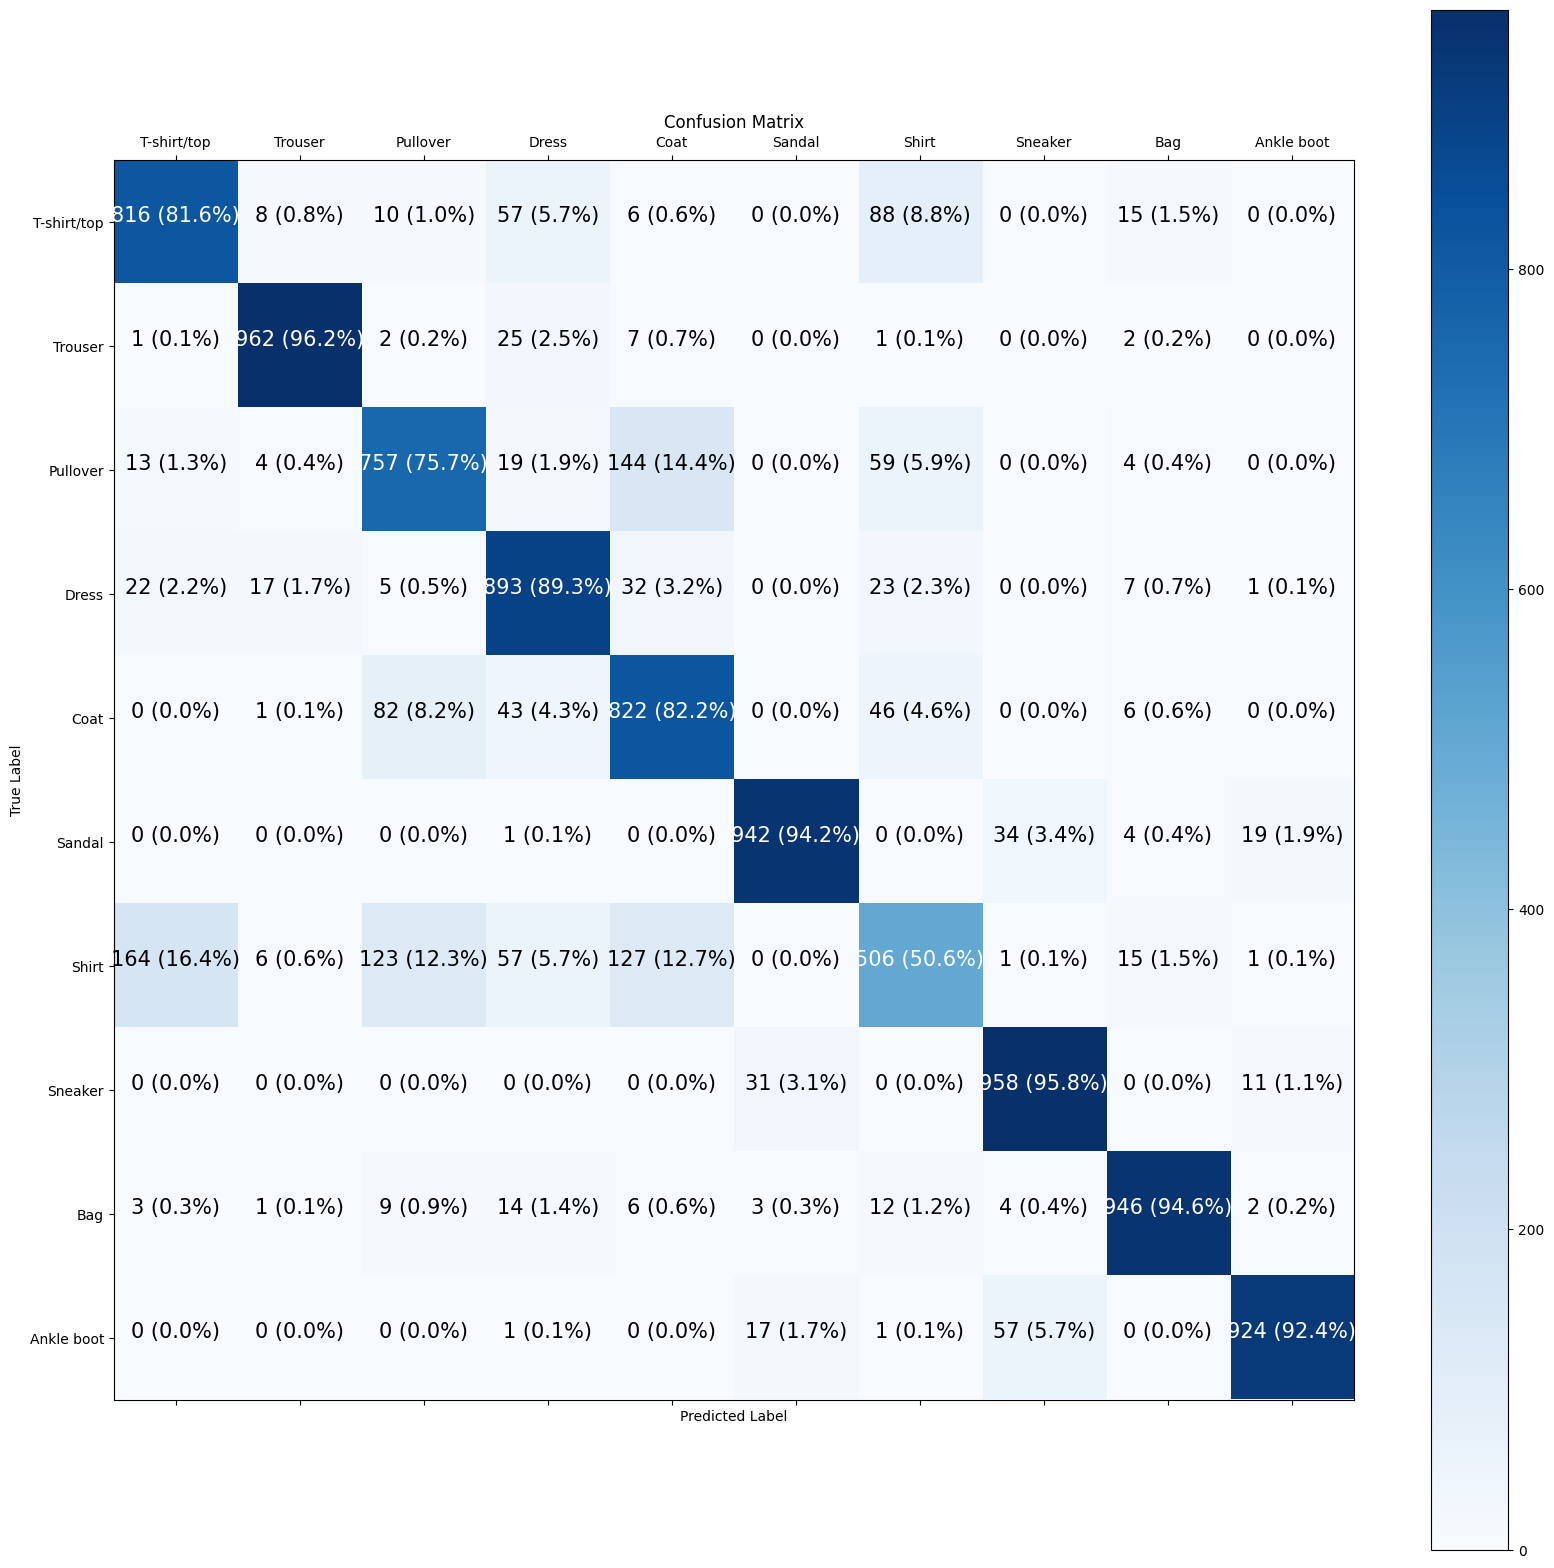

In [54]:
y_preds = mnist_model.predict(test_norm).argmax(axis=1)
make_confusion_matrix(test_labels, y_preds, class_names)

## Visualize 3 predictions with there true lables

1/1 [==============================] - 0s 36ms/step


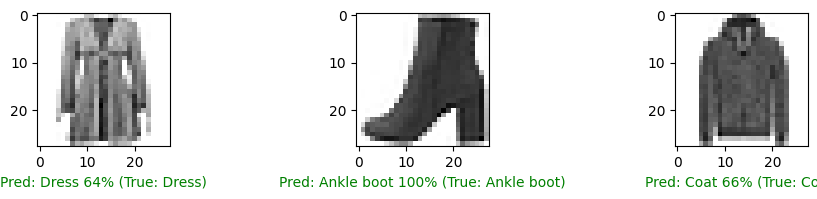

In [93]:
import random

def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label, 100*tf.reduce_max(pred_probs), true_label), color=color)



num_rows = 1
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_random_image(mnist_model, test_norm, test_labels, class_names)

plt.show()

# Implementation of softmax activation function

**Note** - Sum of all probabilities in softfmax output is 1. which is helpful in multiclass classfication because it can predict only one class with maximum probability

In [64]:
X = [1.2, 3.4, 5.6, 6.7]

def softmax(X):
  return tf.exp(X) / tf.reduce_sum(tf.exp(X))

print(softmax(X))
print(tf.reduce_sum(softmax(X)))

tf.Tensor([0.00297471 0.02684676 0.2422923  0.7278862 ], shape=(4,), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
